In [1]:
import torch
import matplotlib.pyplot as plt
import tqdm
import utils
import dataloaders
import numpy as np
import torchvision
import os
from trainer import Trainer
import torch.nn.functional as F
torch.random.manual_seed(0)
np.random.seed(0)
torch.backends.cudnn.benchmark = False
torch.backends.cuda.deterministic = True

### Model Definition

In [11]:
class LeNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        
        ### START YOUR CODE HERE ### (You can change anything inside this block)
        num_input_nodes = 32*32
        num_hidden_nodes = 64
        num_classes = 10
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding = 2)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, stride=1, padding = 1)
        self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2, stride=2, padding = 1)
        self.fc1   = torch.nn.Linear(512, 64)
        self.fc2   = torch.nn.Linear(64, 10)
        

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv3(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)

        #x = x.view(-1, 32*32) 
        #x = self.classifier(x)
        return x


In [14]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding = 2)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding = 2)
        self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding = 2)
        self.fc1   = torch.nn.Linear(4*4*128, 64)
        self.fc2   = torch.nn.Linear(64, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv3(out))
        out = F.max_pool2d(out, 2)
        #print(out.shape)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

### Hyperparameters & Loss function

In [20]:
# Hyperparameters
batch_size = 64
learning_rate = 0.0192
num_epochs = 10

# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

### Train model

In [21]:
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5], [0.25])
])
dataloader_train, dataloader_val = dataloaders.load_dataset(batch_size, image_transform)

# Model definition
model = LeNet()
# Transfer model to GPU memory (if possible)
model = utils.to_cuda(model)

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, val_loss_dict = trainer.train(num_epochs)

Training epoch 9: 100%|██████████| 938/938 [00:06<00:00, 140.25it/s]


### Plot Loss

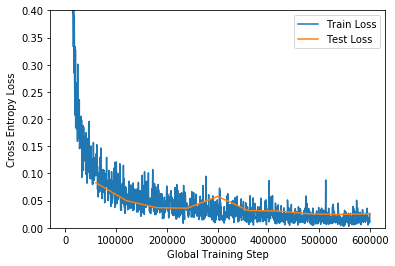

In [23]:
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(val_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, .4])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
os.makedirs("image_processed", exist_ok=True)
plt.savefig(os.path.join("image_processed", "task2.png"))

plt.show()

torch.save(model.state_dict(), "saved_model.torch")


In [19]:

# %%
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_val, model, loss_function)
print(f"Final Validation loss: {final_loss}. Final Validation accuracy: {final_acc}")

# %%

Final Validation loss: 0.040932005781466795. Final Validation accuracy: 0.9873


In [0]:
!python task4d.py

/content/utils.py:77: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")
/content/utils.py:80: ComplexWarning: Casting complex values to real discards the imaginary part
  im = (im*255).astype(np.uint8)
Saving image to: image_processed/moon_sharpened.png


In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
